In [11]:
import numpy as np
import matplotlib.pyplot as plt
 
population=np.array([76212168,92228496,106021537,123202624,132164569,151325798,179323175,203302031,226542199])
years1=np.array([1900,1910,1920,1930,1940,1950,1960,1970,1980])

In [12]:
# Tworzenie funkcji bazowych

years2=years1-1900
years3= years1-1940
years4=(years1-1940)/40



In [13]:
# Tworzenie macierzy Vandermonde'a

def vandermonde_matrix(t):
    return np.vander(t,increasing=False)


In [14]:
# Obliczanie współczynnika uwarunkowania

def condition_number(A):
    return np.linalg.cond(A)
print(f"Współczynniki uwarunkowania dla funkcji pierwszych bazowych: {condition_number(vandermonde_matrix(years1))}")
print(f"Współczynniki uwarunkowania dla funkcji drugich bazowych: {condition_number(vandermonde_matrix(years2))}")
print(f"Współczynniki uwarunkowania dla funkcji trzecich bazowych: {condition_number(vandermonde_matrix(years3))}")
print(f"Współczynniki uwarunkowania dla funkcji czwartych bazowych: {condition_number(vandermonde_matrix(years4))}")

Współczynniki uwarunkowania dla funkcji pierwszych bazowych: 607418337636781.2
Współczynniki uwarunkowania dla funkcji drugich bazowych: 3895611382.11133
Współczynniki uwarunkowania dla funkcji trzecich bazowych: 2095697677.553826
Współczynniki uwarunkowania dla funkcji czwartych bazowych: 1605.4437004786275


In [15]:
# Współczynniki wielomianu interpolacyjnego

def interpolating_polynomial(t,b=population):
    A = vandermonde_matrix(t)
    x = np.linalg.solve(A,b)
    return x

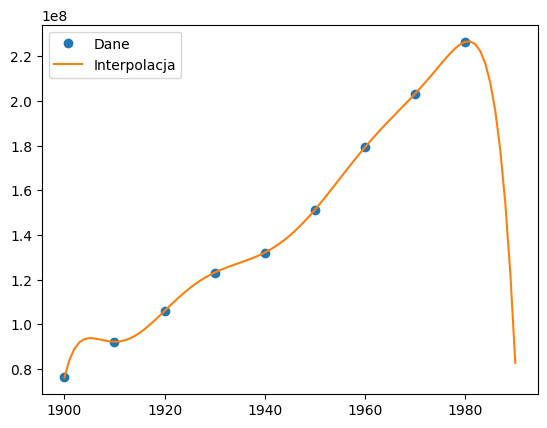

In [16]:
#Wykres

t=np.arange(1900,1991,1)
y = np.polyval(interpolating_polynomial(years4), (t-1940)/40)
plt.plot(years1, population, 'o', label='Dane')
plt.plot(t, y, label='Interpolacja')
plt.legend()
plt.show()

In [17]:
#Błąd Względny

population1990 = np.polyval(interpolating_polynomial(years4), 1990)
error = abs((population1990 - 248709873) / 248709873)
print(f"Błąd względny ekstrapolacji dla roku 1990: {error}")


Błąd względny ekstrapolacji dla roku 1990: 3.1157265876215864e+26


In [18]:
from scipy.interpolate import lagrange
from scipy.interpolate import BarycentricInterpolator



lagrange_poly_years4 = lagrange(years4, population)

# Obliczanie wartości wielomianu Lagrange'a dla Phi4 w odstępach jednorocznych
y_lagrange_years4 = lagrange_poly_years4((t-1940)/40)

# Obliczanie wielomianu interpolacyjnego Newtona dla Phi4
newton_poly_years4 = BarycentricInterpolator(years4, population)

# Obliczanie wartości wielomianu Newtona dla Phi4 w odstępach jednorocznych
y_newton_years4 = newton_poly_years4((t-1940)/40)

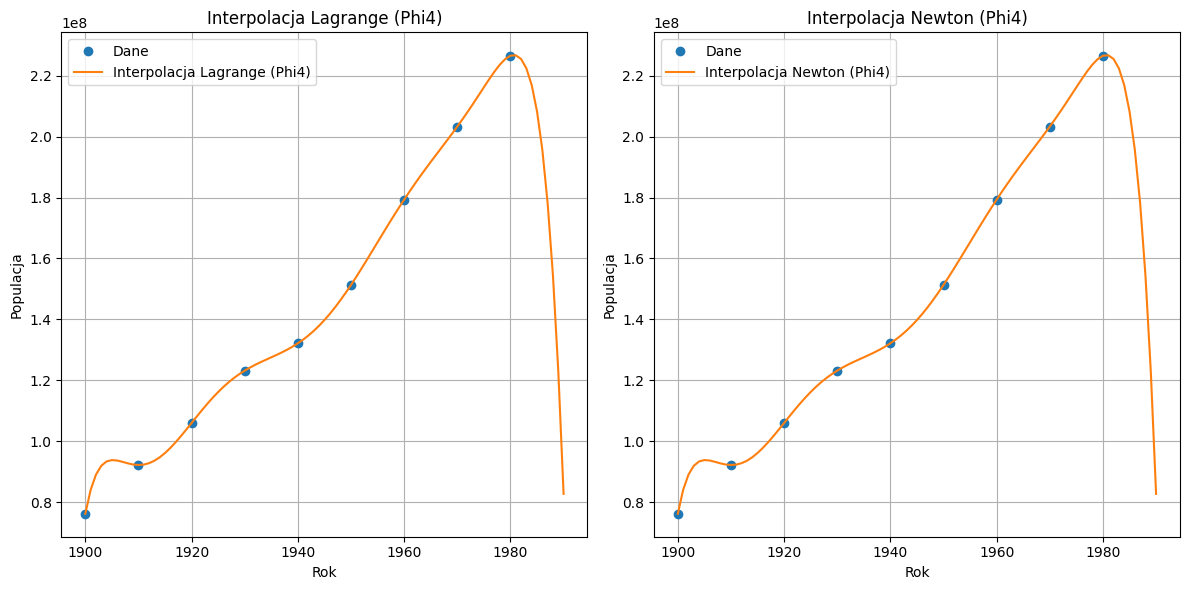

In [19]:
# Wykresy dla interpolacji Lagrange'a i Newtona dla Phi4
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(years1, population, 'o', label='Dane')
plt.plot(t, y_lagrange_years4, label='Interpolacja Lagrange (Phi4)')
plt.legend()
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.title('Interpolacja Lagrange (Phi4)')
plt.grid(True)

# Wykres dla interpolacji Newtona dla Phi4
plt.subplot(1, 2, 2)
plt.plot(years1, population, 'o', label='Dane')
plt.plot(t, y_newton_years4, label='Interpolacja Newton (Phi4)')
plt.legend()
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.title('Interpolacja Newton (Phi4)')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
#To samo ale z własnoręcznie napisanymi funkcjami
# Wielomian interpolacyjny Lagrange'a dla Phi4

def lagrange_interpolation(x, y, t):
    n = len(x)
    L = 0
    for i in range(n):
        l = 1
        for j in range(n):
            if j != i:
                l *= (t - x[j]) / (x[i] - x[j])
        L += y[i] * l
    return L

y_lagrange = lagrange_interpolation(years4, population, (t-1940)/40)


# Wielomian interpolacyjny Newtona dla Phi4

def newton_interpolation(x, y, t):
    n = len(x)
    a = y.copy()
    for i in range(1, n):
        a[i:] = (a[i:] - a[i-1:-1]) / (x[i:] - x[:-i])
    N = a[-1]
    for i in range(n-2, -1, -1):
        N = a[i] + (t - x[i]) * N
    return N

y_newton = newton_interpolation(years4, population, (t-1940)/40)



In [ ]:
# Wykresy dla interpolacji Lagrange'a dla Phi4

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(years1, population, 'o', label='Dane')
plt.plot(t, y_lagrange, label='Interpolacja Lagrange (Phi4)')
plt.legend()
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.title('Interpolacja Lagrange (Phi4)')
plt.grid(True)

# Wykres dla interpolacji Newtona dla Phi4
plt.subplot(1, 2, 2)
plt.plot(years1, population, 'o', label='Dane')
plt.plot(t, y_newton, label='Interpolacja Newton (Phi4)')
plt.legend()
plt.xlabel('Rok')
plt.ylabel('Populacja')
plt.title('Interpolacja Newton (Phi4)')
plt.grid(True)

plt.tight_layout()
plt.show()
